# Shopping Customer Segmentation

Customer segmentation analysis is a process of dividing a customer base into smaller groups of customers who share similar characteristics and needs. This approach helps businesses to understand their customers better and create more targeted marketing strategies. Segmentation is typically done based on various factors such as demographic, geographic, behavioral, and psychographic variables. 
There are various methods for customer segmentation analysis, including:
1. RFM (Recency, Frequency, Monetary) analysis
2. Clustering analysis
3. Decision trees and
4. Factor analysis.

This project is a customer segmentation analysis of a mall customers using unsupervised machine learning in the form of the clustering. The problem statement is to understand the target customers for the marketing team to plan a strategy. Objective is to divide the mall target market into approachable groups, create subsets of the market based on demographics behavior criterial to better understand the target for marketing activities. 

importing necessary libraries 

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import seaborn as sn
import matplotlib
from matplotlib import figure
import matplotlib.pyplot as plt
plt.style.use("ggplot")
matplotlib.rcParams["figure.figsize"] = (8, 4)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

importing the dataset

link to dataset: https://github.com/Gaelim/Mall-Customer-Segmentation/blob/main/Mall_Customers.csv

In [2]:
customer = pd.read_csv(r"C:\Users\lolad\Desktop\Customer Segmentation Analysis\Dataset\Mall Customers.csv")
customer

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


data preparation

In [3]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
customer.dropna(how = "all", inplace = True)

# Exploratory Analysis

In [5]:
customer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Univariant Analysis

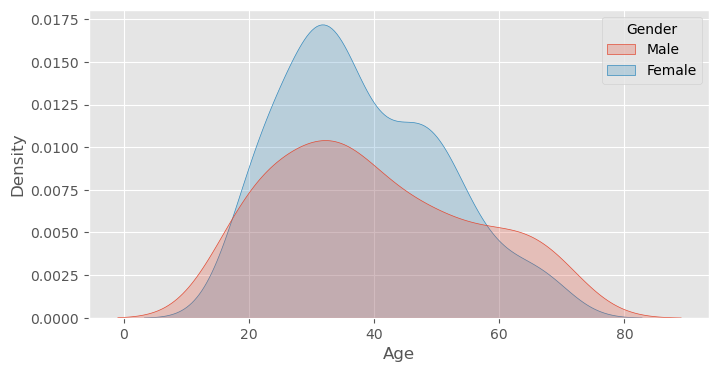

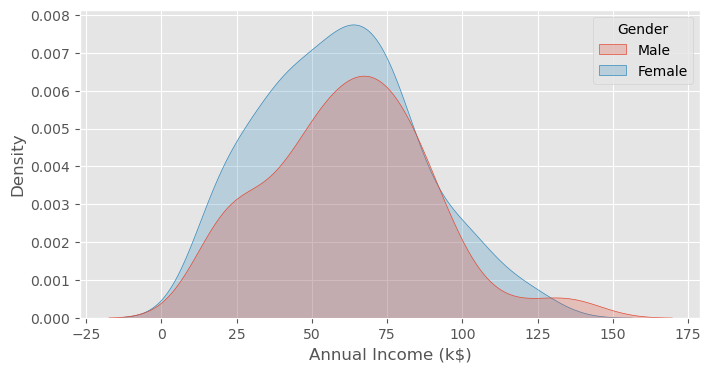

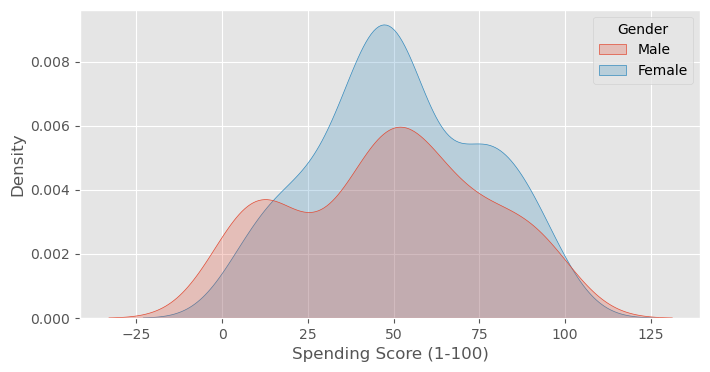

In [6]:
#Performing a Kernel Density Estimate (KDE) plot to visualize the distribution of observations in the dataset.
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sn.kdeplot(data = customer, x = customer[i], hue = customer["Gender"], shade = True)

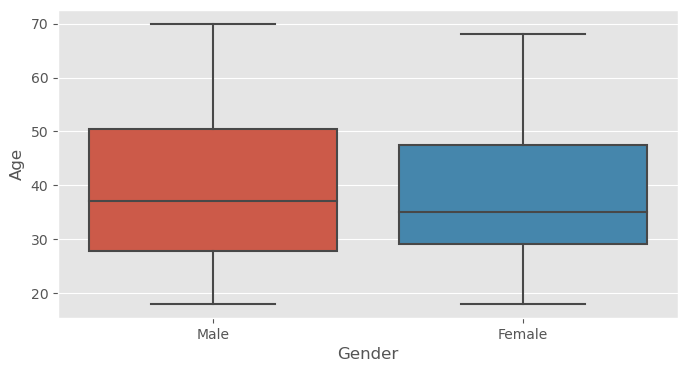

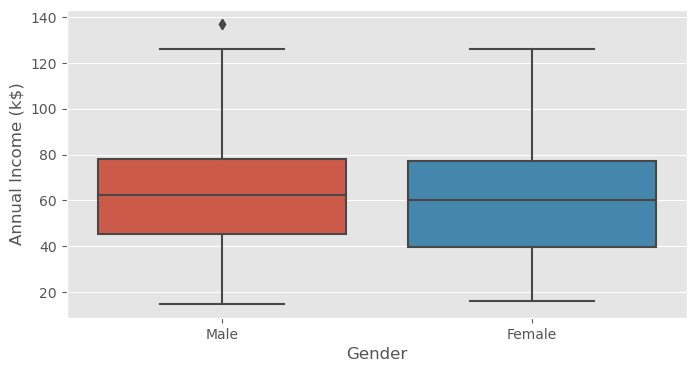

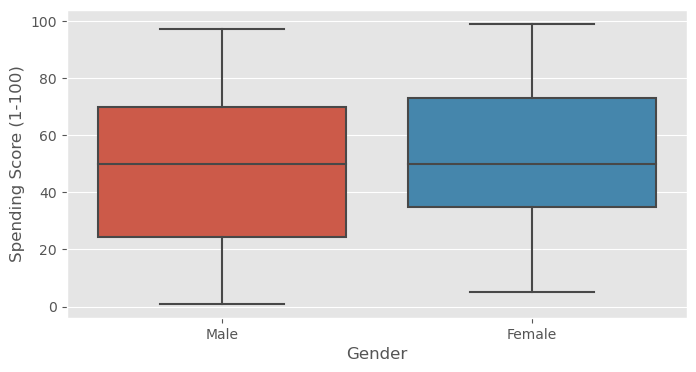

In [7]:
#Performing a Boxplot to display the distribution of the dataset based on the minimum, first quartile, median, third quartile, and maximum.
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sn.boxplot(data = customer, y = customer[i], x = customer["Gender"])

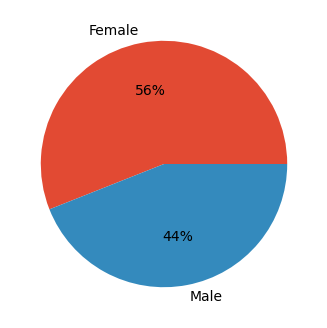

In [8]:
#Finding out the proportion of male to female
fm = customer["Gender"].value_counts(normalize = True).to_frame().reset_index()
fm.rename(columns = {"Gender":"Percentage","index":"Gender"}, inplace = True)
plt.pie(x = fm["Percentage"], labels = fm["Gender"], autopct= "%0.f%%");

Bivariant Analysis

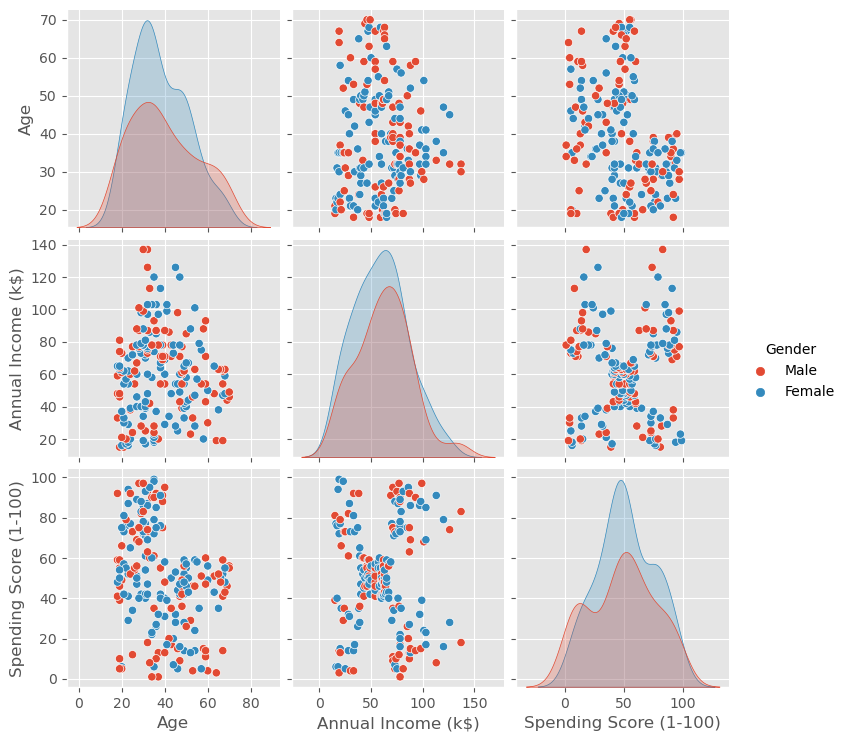

In [9]:
# Performing a pairplot plot a pairwise relationships in the dataset.
customers = customer.drop(columns = "CustomerID")
sn.pairplot(data = customers,hue = "Gender");

In [10]:
#Groupung the dataset by Gender to find out the average age, annual income and spending score.
customer.groupby("Gender")['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [11]:
#Performing correlation analysis to measure that expresses the extent to which the variables are linearly related 
customer.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


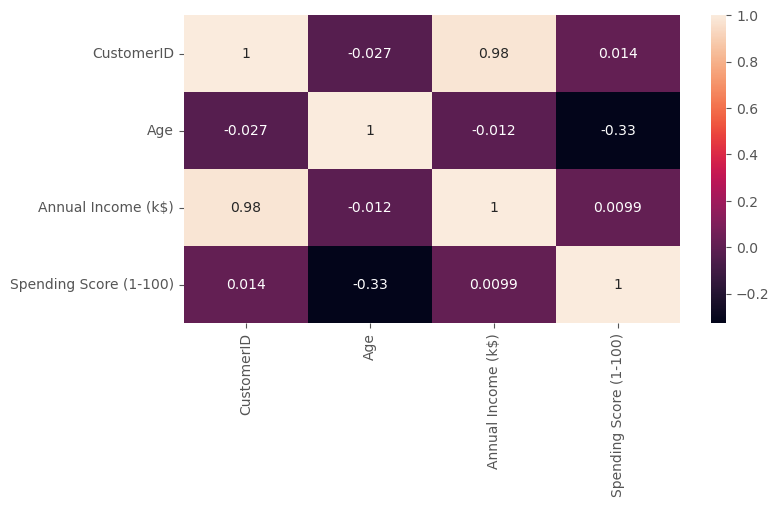

In [12]:
#Visualizing the correlation using heatmap
sn.heatmap(customer.corr(), annot = True);

# Clustering

Univariate Clustering Analysis

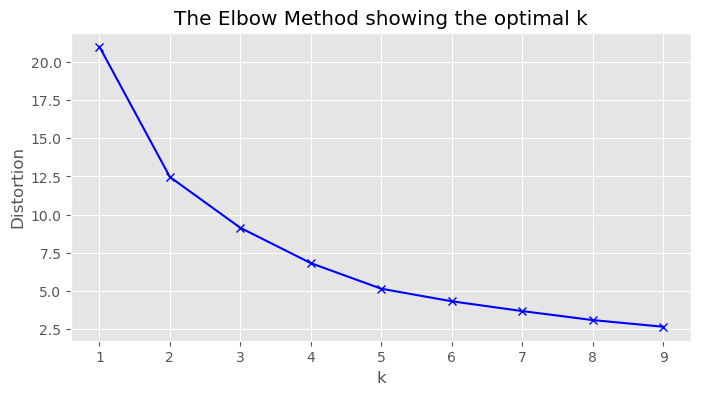

In [13]:
#using the elbow method to get the amount of cluster to be used
distortions = []
K = range(1, 10)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(customer[["Annual Income (k$)"]])
    distortions.append(sum(np.min(cdist(customer[["Annual Income (k$)"]],
                                        model.cluster_centers_, 'euclidean'), axis=1))
                       / customer[["Annual Income (k$)"]].shape[0])

# Plot the elbow curve
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [14]:
#Performing univariant cluster analysis described by the annual income variable.
cluster1 = KMeans(n_clusters = 3)
cluster1.fit(customer[["Annual Income (k$)"]])
customer["Income Cluster"] = cluster1.labels_
customer

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,2
197,198,Male,32,126,74,2
198,199,Male,32,137,18,2


In [15]:
#Grouping the dataset by the annual income cluster to find out the average age, annual income and spending score in each cluster.
customer.groupby("Income Cluster")['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


Bivarient Clustering Analysis

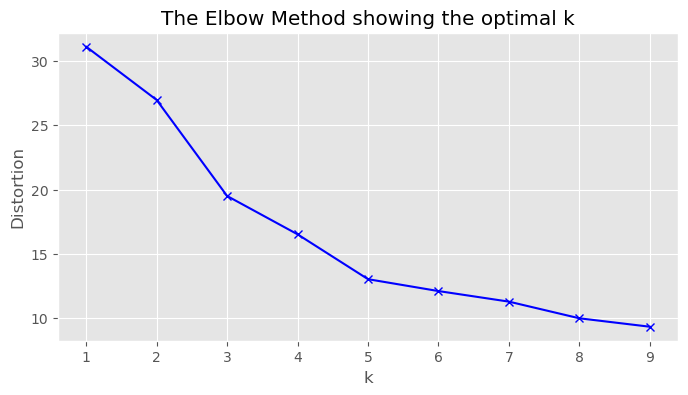

In [16]:
#using the elbow method to get the amount of cluster to be used
distortions = []
K = range(1, 10)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(customer[["Annual Income (k$)", "Spending Score (1-100)"]])
    distortions.append(sum(np.min(cdist(customer[["Annual Income (k$)", "Spending Score (1-100)"]]
                                        , model.cluster_centers_, 'euclidean'), axis=1))
                       / customer[["Annual Income (k$)", "Spending Score (1-100)"]].shape[0])

# Plot the elbow curve
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [17]:
#Performing bivariant cluster analysis described by the annual income and spending score variable
cluster2 = KMeans(n_clusters = 5)
cluster2.fit(customer[["Annual Income (k$)", "Spending Score (1-100)"]])
customer["Income&Score Cluster"] = cluster2.labels_
customer

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income&Score Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,3
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,3
4,5,Female,31,17,40,1,4
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,1
196,197,Female,45,126,28,2,0
197,198,Male,32,126,74,2,1
198,199,Male,32,137,18,2,0


In [18]:
#Grouping the dataset by income & score cluster to find out the average age, annual income and spending score in each cluster.
customer.groupby("Income&Score Cluster")["Age", "Annual Income (k$)", "Spending Score (1-100)"].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income&Score Cluster,,,
0,41.114286,88.200000,17.114286
1,32.692308,86.538462,82.128205
2,42.716049,55.296296,49.518519
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


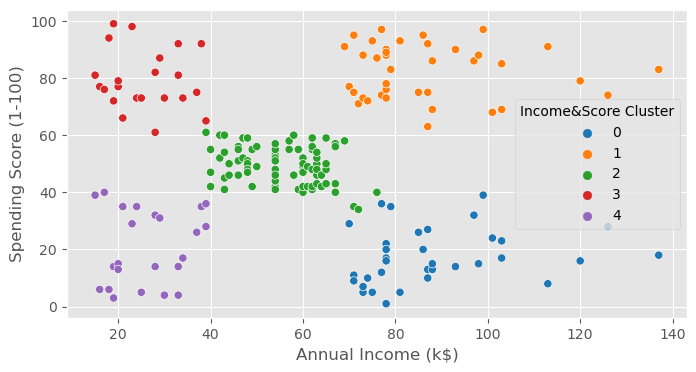

In [19]:
#performing scatter plot to visualize the clusters 
sn.scatterplot(data = customer, x = "Annual Income (k$)", y = "Spending Score (1-100)", 
               hue = "Income&Score Cluster", palette= "tab10");

In [21]:
#finding out the proportion of male to female in each cluster
pd.crosstab(customer["Income&Score Cluster"], customer["Gender"], normalize = True)

Gender,Female,Male
Income&Score Cluster,,
0,0.080,0.095
1,0.105,0.090
2,0.240,0.165
3,0.065,0.045
4,0.070,0.045


# Results:

1. Customers in cluster 1 have the highest spending score, most of them are females (10.5% of the customers).
2. Cluster 3 customers have the lowest annual income and happens to have a high spending score, they're youngest (they make up 11% of the customers, 6.5% of female and 4.5% of male).
3. Customers in cluster 0 have the lowest spending score and the highest annual income, they are made up of more male than female (9.5% to 8.0%)
4. Customer in cluster 4 are the oldest and they have low annual income and spending score.

# Customer's Cluster:


In [30]:
cluster0 = customer[customer["Income&Score Cluster"] == 0]
cluster0

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income&Score Cluster
124,125,Female,23,70,29,0,0
128,129,Male,59,71,11,0,0
130,131,Male,47,71,9,0,0
134,135,Male,20,73,5,0,0
136,137,Female,44,73,7,0,0
138,139,Male,19,74,10,0,0
140,141,Female,57,75,5,0,0
144,145,Male,25,77,12,0,0
146,147,Male,48,77,36,0,0
148,149,Female,34,78,22,0,0


In [27]:
cluster1 = customer[customer["Income&Score Cluster"] == 1]
cluster1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income&Score Cluster
123,124,Male,39,69,91,0,1
125,126,Female,31,70,77,0,1
127,128,Male,40,71,95,0,1
129,130,Male,38,71,75,0,1
131,132,Male,39,71,75,0,1
133,134,Female,31,72,71,0,1
135,136,Female,29,73,88,0,1
137,138,Male,32,73,73,0,1
139,140,Female,35,74,72,0,1
141,142,Male,32,75,93,0,1


In [28]:
cluster2 = customer[customer["Income&Score Cluster"] == 2]
cluster2

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income&Score Cluster
43,44,Female,31,39,61,1,2
46,47,Female,50,40,55,1,2
47,48,Female,27,40,47,1,2
48,49,Female,29,40,42,1,2
49,50,Female,31,40,42,1,2
...,...,...,...,...,...,...,...
121,122,Female,38,67,40,0,2
122,123,Female,40,69,58,0,2
126,127,Male,43,71,35,0,2
132,133,Female,25,72,34,0,2


In [29]:
cluster3 = customer[customer["Income&Score Cluster"] == 3]
cluster3

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income&Score Cluster
1,2,Male,21,15,81,1,3
3,4,Female,23,16,77,1,3
5,6,Female,22,17,76,1,3
7,8,Female,23,18,94,1,3
9,10,Female,30,19,72,1,3
11,12,Female,35,19,99,1,3
13,14,Female,24,20,77,1,3
15,16,Male,22,20,79,1,3
17,18,Male,20,21,66,1,3
19,20,Female,35,23,98,1,3


In [31]:
cluster4 = customer[customer["Income&Score Cluster"] == 4]
cluster4

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income&Score Cluster
0,1,Male,19,15,39,1,4
2,3,Female,20,16,6,1,4
4,5,Female,31,17,40,1,4
6,7,Female,35,18,6,1,4
8,9,Male,64,19,3,1,4
10,11,Male,67,19,14,1,4
12,13,Female,58,20,15,1,4
14,15,Male,37,20,13,1,4
16,17,Female,35,21,35,1,4
18,19,Male,52,23,29,1,4
